In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from random import shuffle
# from scipy.signal import stft, periodogram
from scipy import signal, fft
import scipy.signal
from scipy.io.wavfile import write
import IPython.display as ipd
import librosa

# import spectrum
# could you make spectrogram code for me?


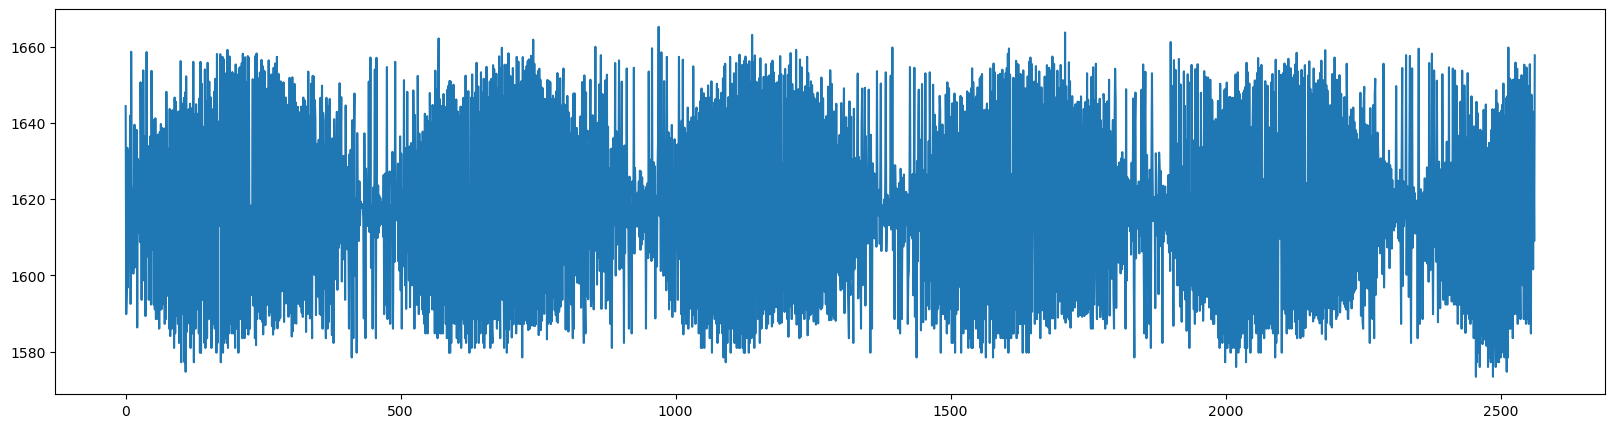

In [9]:
# sig1 = np.loadtxt('/Users/sehwan/Desktop/datasets/batch 2/pure tune/250Hz.txt', delimiter='\t')
# sig1 = np.loadtxt('/Users/sehwan/Desktop/datasets/batch 2/pure tune/350Hz.txt', delimiter='\t')
input_audio = np.loadtxt('/Users/sehwan/Desktop/datasets/batch 2/pure tune/500Hz.txt', delimiter='\t')
# sig1 = np.loadtxt('/Users/sehwan/Desktop/datasets/batch 2/bowel sounds/Bowel_sound_high_fiber_H.txt', delimiter='\t')
sr = 500

plt.figure(figsize=(20, 5))
plt.plot(input_audio)
plt.show()

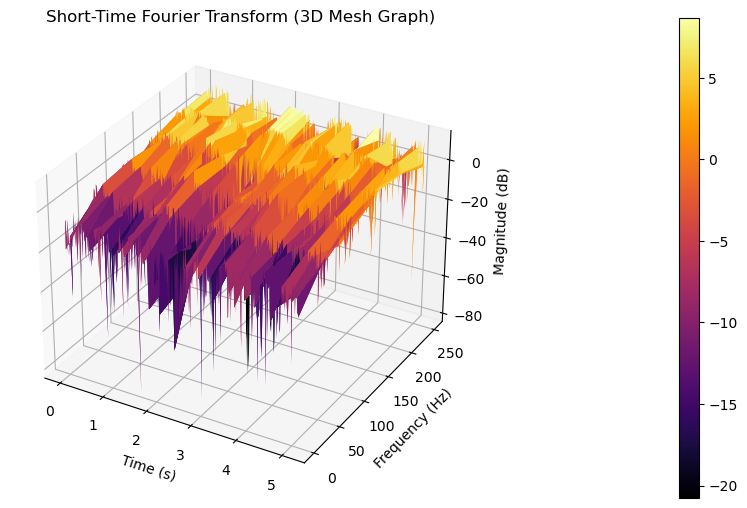

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Compute the STFT
window_size = int(sr * 0.02)  # Size of the analysis window (20 ms)
hop_size = int(sr * 0.01)  # Hop size between consecutive windows (10 ms)
frequencies, times, magnitude = spectrogram(input_audio, fs=sr, window='hann', nperseg=window_size, noverlap=hop_size)

# Plot the STFT as a 3D mesh graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
T, F = np.meshgrid(times, frequencies)
ax.plot_surface(T, F, 10 * np.log10(magnitude), cmap='inferno')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_zlabel('Magnitude (dB)')
ax.set_title('Short-Time Fourier Transform (3D Mesh Graph)')
# plt.colorbar()
surf = ax.plot_surface(T, F, 10 * np.log10(magnitude), cmap='inferno')

# Create a separate 2D plot for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.02, 0.8])
plt.colorbar(surf, cax=ax2)

plt.show()

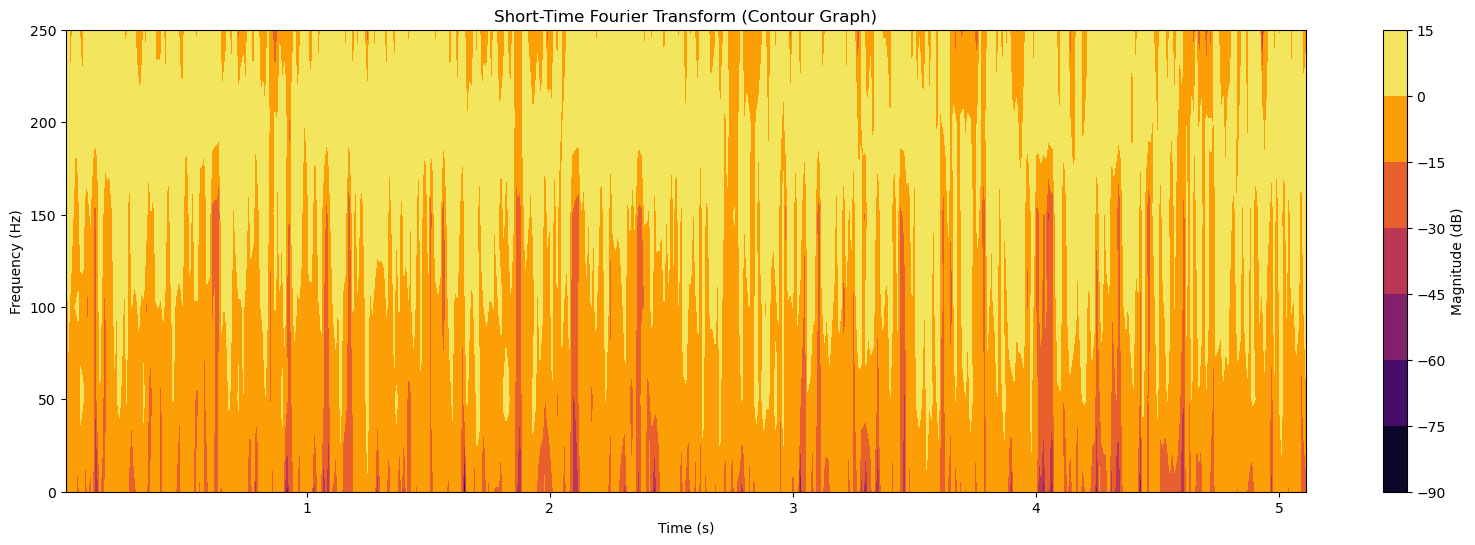

In [5]:
# Compute the STFT
window_size = int(sr * 0.02)  # Size of the analysis window (20 ms)
hop_size = int(sr * 0.01)  # Hop size between consecutive windows (10 ms)
frequencies, times, magnitude = spectrogram(input_audio, fs=sr, window='hann', nperseg=window_size, noverlap=hop_size)

# Plot the STFT as a Contour graph
plt.figure(figsize=(20, 6))
plt.contourf(times, frequencies, 10 * np.log10(magnitude), cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform (Contour Graph)')
plt.show()

/Users/sehwan/opt/miniconda3/lib/python3.9/site-packages/librosa/feature/spectral.py:2157: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


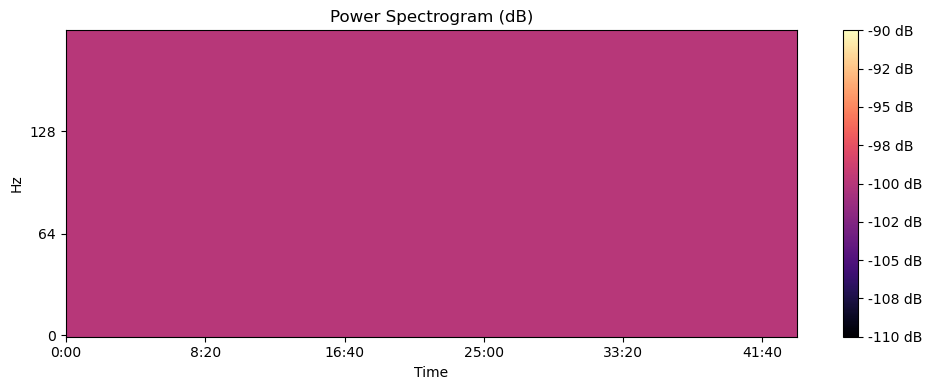

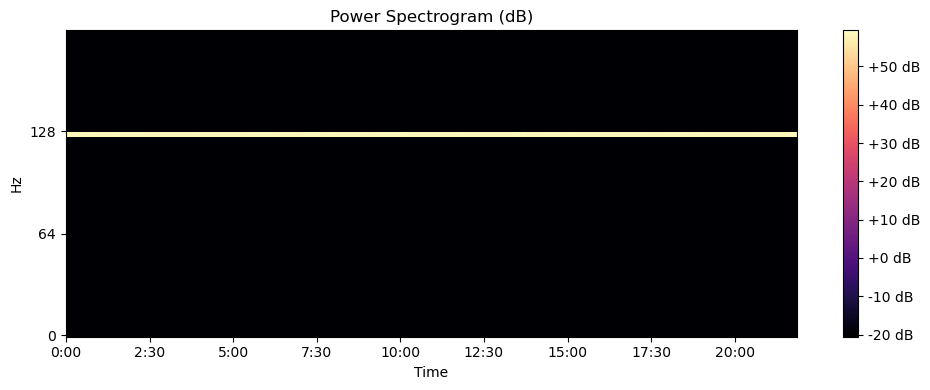

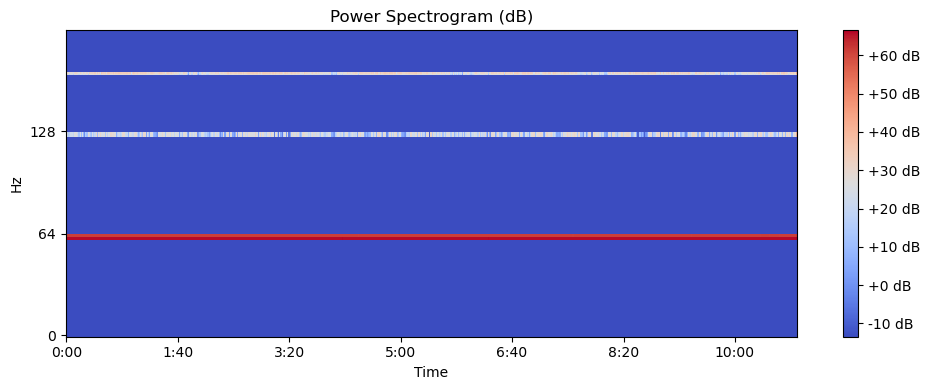

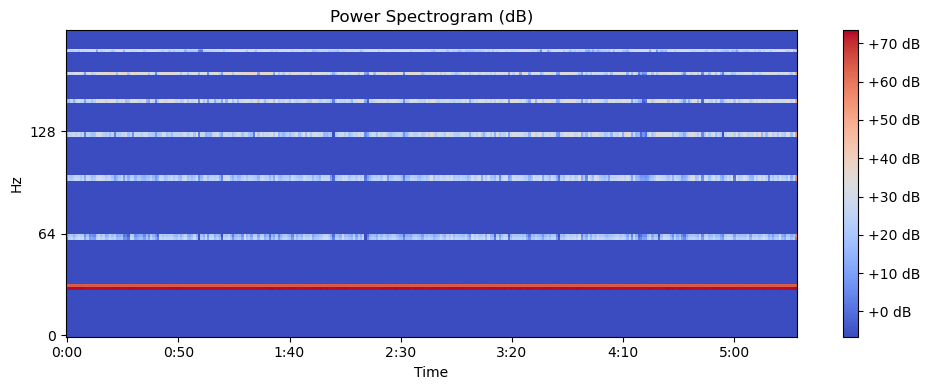

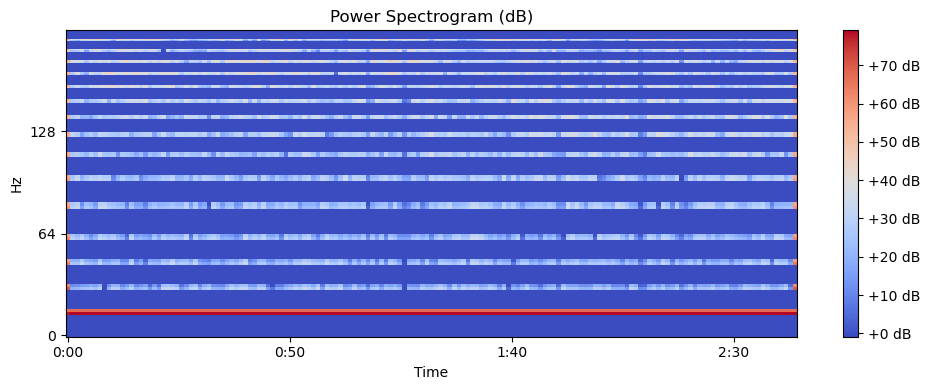

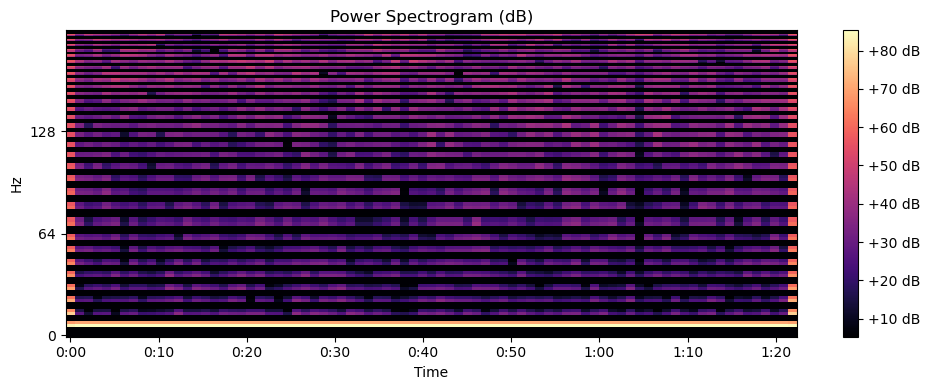

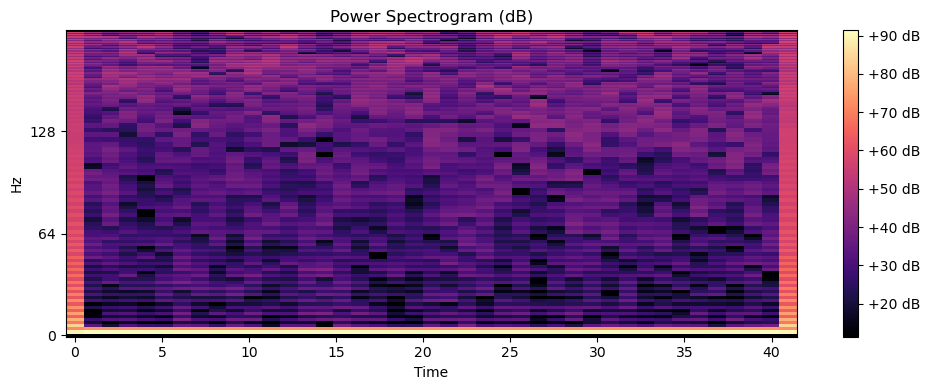

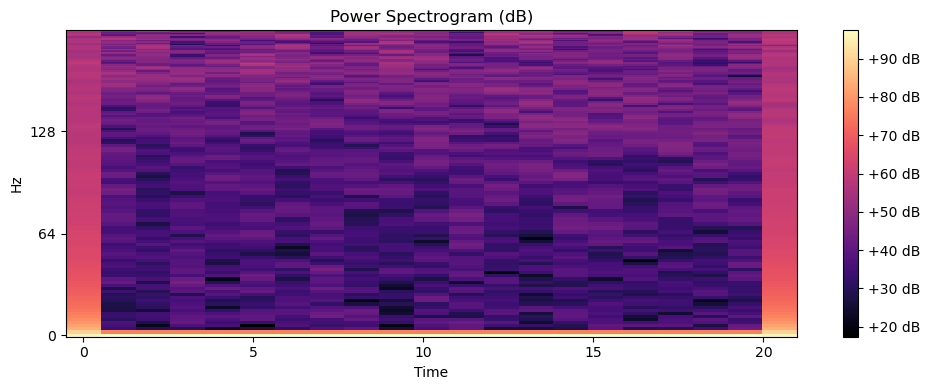

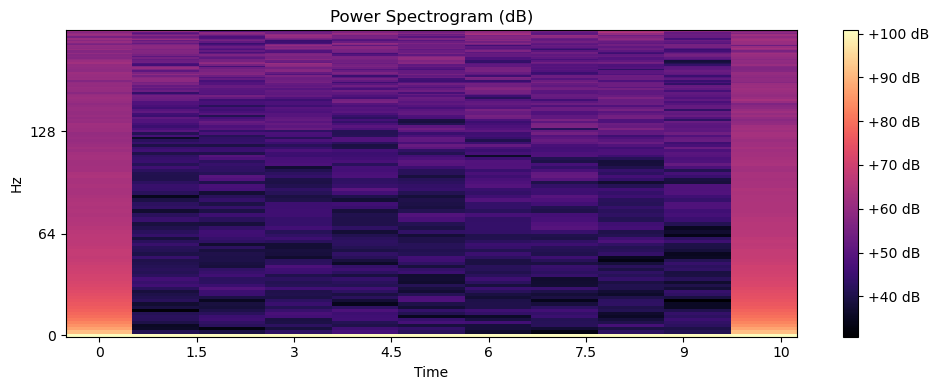

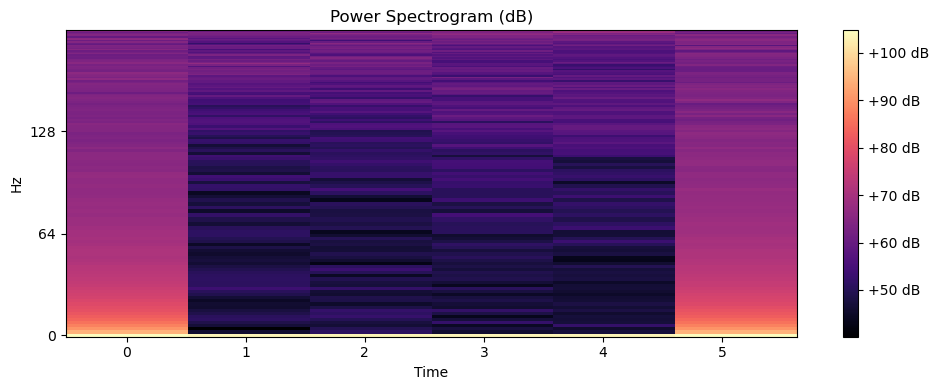

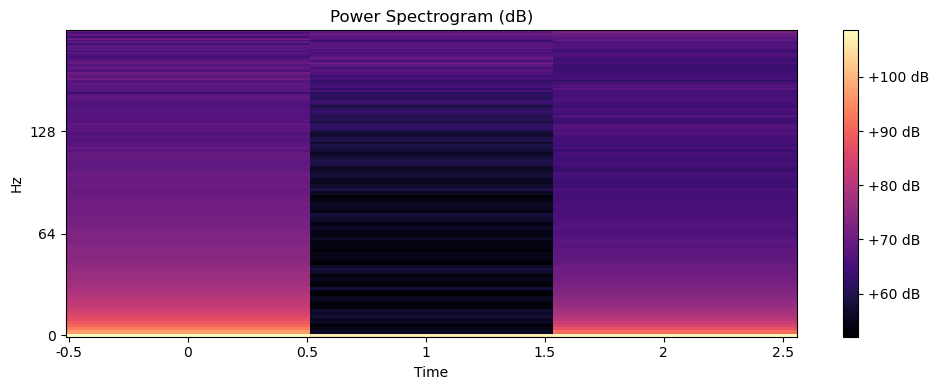

In [15]:
# Compute the power spectrogram
for i in range(11):
    n_fft = 2 ** (i+1)
    hop_length = n_fft // 2
    power_spec = librosa.feature.melspectrogram(y=input_audio, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # Convert power spectrogram to dB scale
    power_db = librosa.power_to_db(power_spec)

    # Display the power spectrogram in dB
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(power_db, sr=sr, hop_length=512, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Power Spectrogram (dB)')
    plt.tight_layout()
    plt.show()